<a href="https://colab.research.google.com/github/chvn00/Modelos_Metodos_IA/blob/main/PGValvula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar gplearn
!pip install gplearn

import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    29.80           692.66       52           1.8417          2.03263      4.74s
   1    43.89          3.12487       52          1.29268          1.19898      5.00s
   2    49.48          3.38721       51         0.761544         0.683946      5.70s
   3    46.81          2.55102       56          0.28716         0.210483      5.87s
   4    55.06          2.47066       59         0.234565         0.176222      5.39s
   5    57.95          2.41065       54         0.203844         0.196245      5.36s
   6    54.79          1.74219       54         0.193252          0.29157      5.07s
   7    53.96           1.2848       54         0.194352         0.281674      6.48s
   8    50.81          2.15503       54         0.193547         0.288922  

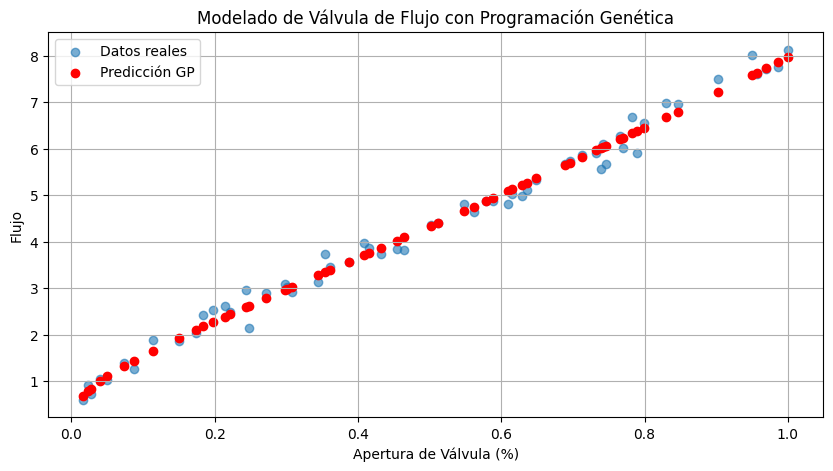

In [ ]:


# 1. Simulación de datos reales de una válvula
np.random.seed(42)
n = 300
apertura = np.linspace(0, 1, n)  # Entrada de control (0 a 100%)

# Ecuación oculta del flujo: simulamos un comportamiento real
# Flujo = k1 * sqrt(apertura) + k2 * apertura^2 + ruido
k1 = 5
k2 = 3
flujo = k1 * np.sqrt(apertura) + k2 * apertura**2 + np.random.normal(0, 0.2, n)

# 2. Dataset
X = apertura.reshape(-1, 1)
y = flujo

# 3. División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Modelo GP
gp = SymbolicRegressor(
    population_size=100,
    generations=50,
    tournament_size=100,
    stopping_criteria=0.001,
    function_set=['add', 'sub', 'mul', 'div', 'sqrt'],
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    random_state=0
)

# 5. Entrenar
gp.fit(X_train, y_train)

# 6. Mostrar ecuación generada
print("\n📌 Ecuación encontrada por Programación Genética:")
print(gp._program)

# 7. Predicción y error
y_pred = gp.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print(f"🔍 Error cuadrático medio (MSE): {mse:.4f}")

# 8. Gráfica de ajuste
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Datos reales', alpha=0.6)
plt.scatter(X_test, y_pred, label='Predicción GP', color='red')
plt.title('Modelado de Válvula de Flujo con Programación Genética')
plt.xlabel('Apertura de Válvula (%)')
plt.ylabel('Flujo')
plt.legend()
plt.grid(True)
plt.show()
